In [1]:
%load_ext autoreload
%load_ext tensorboard
%matplotlib inline

In [2]:
import matplotlib
import numpy as np
import os
import random
import yaml
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rc
from matplotlib import cm
import seaborn as sns
from importlib import reload
from pathlib import Path
import sklearn
import joblib
import torch
import pandas as pd
import copy

import sys
sys.path.append("../experiments")
from run_experiments import _generate_dataset_and_update_config

# Set the font to a nicer font
rc('text', usetex=False)
plt.style.use('seaborn-whitegrid')
plt.rcParams["font.family"] = "serif"

# CUB Visualization

In [3]:
CUB_DIR = "/homes/me466/data/CUB200/"
CUB_IMAGE_DIR = os.path.join(CUB_DIR, "CUB_200_2011/images/")
CUB_IMAGE_PATH_FILE = os.path.join(CUB_DIR, "CUB_200_2011/images.txt")

with open(CUB_IMAGE_PATH_FILE, 'r') as f:
    cub_image_paths = [x.rstrip().split(" ")[-1] for x in f]
print("Found a total of", len(cub_image_paths), "CUB images")

Found a total of 11788 CUB images


Using images [10476]
Working with 1 images!


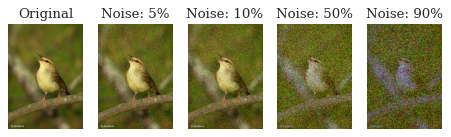

Using images [631]
Working with 1 images!


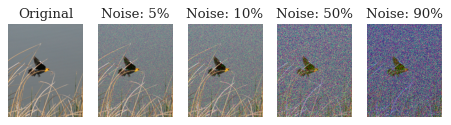

Using images [6693]
Working with 1 images!


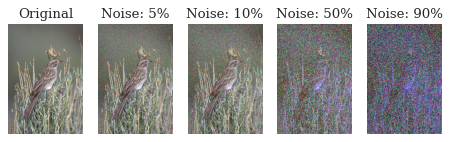

Using images [4454]
Working with 1 images!


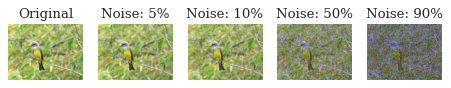

Using images [1251]
Working with 1 images!


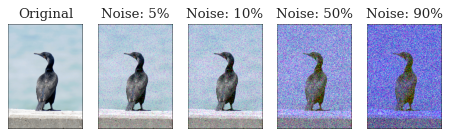

In [9]:
# Load CUB Images onto memory to speed things up
from PIL import Image
import random
from cem.data.utils import transform_from_config

number_of_times = 5
num_samples = 1
noise_levels = [0, 0.05, 0.1, 0.5, 0.9]

for i in range(number_of_times):
    random.seed(42 + i)
    np.random.seed(42 + i)

    used_indices = random.sample(range(len(cub_image_paths)), num_samples)
    print("Using images", used_indices)
    cub_images = [
        Image.open(os.path.join(CUB_DIR, f"CUB_200_2011/images/{cub_image_paths[x]}"))
        for x in used_indices
    ]
    print(f"Working with {len(cub_images)} images!")
    fig, axs = plt.subplots(
        num_samples,
        len(noise_levels),
        figsize=(7*num_samples, 7*len(noise_levels)),
        dpi=80,
        squeeze=False,
    )

    for row, img in enumerate(cub_images):
        for col, noise_level in enumerate(noise_levels):
            test_transform_config = dict(
                name='salt_and_pepper',
                amount=noise_level,
                s_vs_p=0.5,
            )
            ax = axs[row, col]
            transform = transform_from_config(test_transform_config)
            ax.imshow(transform(torch.tensor(np.array(img))))
            if row == 0:
                if noise_level:
                    ax.set_title(f'Noise: {int(noise_level*100)}%')
                else:
                    ax.set_title(f'Original')
            ax.axis("off")
            ax.axis(False)
    plt.savefig(f"../figures/noised_cub_examples_{i}.pdf", bbox_inches='tight')
    plt.savefig(f"../figures/noised_cub_examples_{i}.png", bbox_inches='tight')
    plt.show()

Using images [10476, 1824, 409]
Working with 3 images!


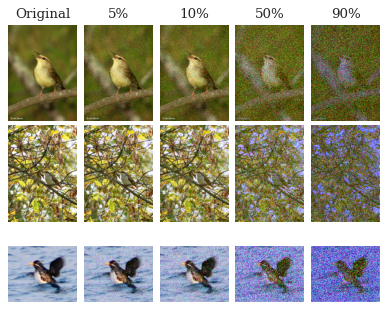

Using images [631, 4687, 11406]
Working with 3 images!


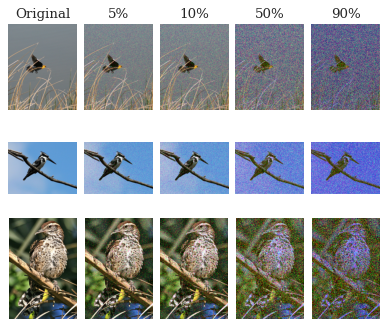

Using images [6693, 8520, 8879]
Working with 3 images!


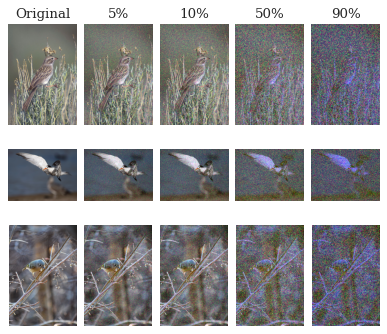

In [18]:
# Load CUB Images onto memory to speed things up
from PIL import Image
import random
from cem.data.utils import transform_from_config

number_of_times = 3
num_samples = 3
noise_levels = [0, 0.05, 0.1, 0.5, 0.9]

for i in range(number_of_times):
    random.seed(42 + i)
    np.random.seed(42 + i)

    used_indices = random.sample(range(len(cub_image_paths)), num_samples)
    print("Using images", used_indices)
    cub_images = [
        Image.open(os.path.join(CUB_DIR, f"CUB_200_2011/images/{cub_image_paths[x]}"))
        for x in used_indices
    ]
    print(f"Working with {len(cub_images)} images!")
    fig, axs = plt.subplots(
        num_samples,
        len(noise_levels),
        figsize=(2*num_samples, len(noise_levels)),
        dpi=80,
        squeeze=False,
    )

    for row, img in enumerate(cub_images):
        for col, noise_level in enumerate(noise_levels):
            test_transform_config = dict(
                name='salt_and_pepper',
                amount=noise_level,
                s_vs_p=0.5,
            )
            ax = axs[row, col]
            transform = transform_from_config(test_transform_config)
            ax.imshow(transform(torch.tensor(np.array(img))))
            if row == 0:
                if noise_level:
                    ax.set_title(f'{int(noise_level*100)}%')
                else:
                    ax.set_title(f'Original')
            ax.axis("off")
            ax.axis(False)
    plt.subplots_adjust(wspace=0.1, hspace=0)
    plt.savefig(f"../figures/noised_grid_cub_examples_{i}.pdf", bbox_inches='tight')
    plt.savefig(f"../figures/noised_grid_cub_examples_{i}.png", bbox_inches='tight')
    plt.show()

In [4]:
results_dir = '/anfs/bigdisc/me466/mixcem_results/cub_incomplete'
config = joblib.load(
    os.path.join(
        results_dir,
        'DNN_extra_dims_0_experiment_config.joblib', # Select this config as a representative for the dataset (given that it is there for all tasks)
    )
)
config['dataset_config']['train_augment'] = False # Do not augment it as we want to visualise it
(_, val_dl, _, _, concept_map, _, _, _) = _generate_dataset_and_update_config(config)

Global seed set to 42


		Selected concepts: [0, 1, 2, 3, 37, 38, 39, 40, 41, 42, 43, 44, 51, 52, 76, 77, 86, 87, 88, 99, 100, 101]
		Updated concept group map (with 7 groups):
			has_bill_shape -> [0, 1, 2, 3]
			has_head_pattern -> [4, 5]
			has_breast_color -> [6, 7, 8, 9, 10, 11]
			has_bill_length -> [12, 13]
			has_wing_shape -> [14, 15]
			has_tail_pattern -> [16, 17, 18]
			has_bill_color -> [19, 20, 21]


In [6]:
# Move it to memory
import cem.utils.data as data_utils
x_val, y_val, c_val = data_utils.daloader_to_memory(val_dl)

Using images [228, 51, 563]
Working with 3 images!


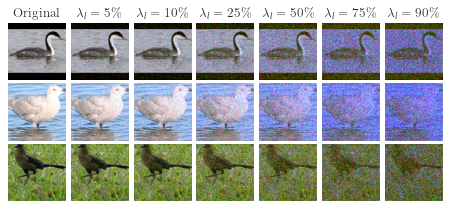

In [14]:
rc('text', usetex=True)

from PIL import Image
import random
from cem.data.utils import transform_from_config

number_of_times = 3
num_samples = 3
noise_levels = [0, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]

random.seed(42)
np.random.seed(42)

used_indices = random.sample(range(x_val.shape[0]), num_samples)
print("Using images", used_indices)
cub_images = [
    np.transpose(x_val[x, :, :, :], (1, 2, 0)) * np.array((2, 2, 2)) + np.array((0.5, 0.5, 0.5))
    for x in used_indices
]
print(f"Working with {len(cub_images)} images!")
fig, axs = plt.subplots(
    num_samples,
    len(noise_levels),
    figsize=(len(noise_levels), num_samples),
    dpi=80,
    squeeze=False,
)

for row, img in enumerate(cub_images):
    for col, noise_level in enumerate(noise_levels):
        test_transform_config = dict(
            name='salt_and_pepper',
            amount=noise_level,
            s_vs_p=0.5,
        )
        ax = axs[row, col]
        transform = transform_from_config(test_transform_config)
        ax.imshow(transform(torch.tensor(img)))
        if row == 0:
            if noise_level:
                ax.set_title(r'$\lambda_{l} = '  + str(int(noise_level*100)) + r'\%$')
            else:
                ax.set_title(f'Original')
        ax.axis("off")
        ax.axis(False)
plt.subplots_adjust(wspace=0.1, hspace=0)
plt.savefig(f"../figures/noised_grid_cub_examples.pdf", bbox_inches='tight')
plt.savefig(f"../figures/noised_grid_cub_examples.png", bbox_inches='tight')
plt.show()

# Restore
rc('text', usetex=False)


# TravelBirds Visualization

In [3]:
results_dir = '/anfs/bigdisc/me466/mixcem_results/travelingbirds_complete'
config = joblib.load(
    os.path.join(
        results_dir,
        'DNN_extra_dims_0_experiment_config.joblib', # Select this config as a representative for the dataset (given that it is there for all tasks)
    )
)
config['dataset_config']['train_augment'] = False # Do not augment it as we want to visualise it
(tb_train_dl, tb_val_dl, tb_test_dl, _, concept_map, _, _, _) = _generate_dataset_and_update_config(config)

Global seed set to 42


In [4]:
# Move it to memory
import cem.utils.data as data_utils
tb_x_train, tb_y_train, tb_c_train = data_utils.daloader_to_memory(tb_train_dl)
tb_x_test, tb_y_test, tb_c_test = data_utils.daloader_to_memory(tb_test_dl)

For class Yellow_headed_Blackbird at index 11
Working with 4 images!
Working with 4 images!


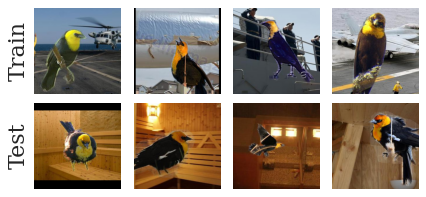

In [19]:
import random
from cem.data.utils import transform_from_config
from cem.data.CUB200.cub_loader import CLASS_NAMES




number_of_times = 1
num_samples = 4
for used_class_name in ['Yellow_headed_Blackbird']:

    fig, axs = plt.subplots(
        2,
        num_samples,
        figsize=(2*num_samples, 3),
        dpi=80,
        squeeze=False,
    )
    # used_class_name = 'Artic_Tern'
    random.seed(42)
    np.random.seed(42)
    used_class = CLASS_NAMES.index(used_class_name)
    print("For class", used_class_name, "at index", used_class)
    candidate_train_samples = tb_y_train == used_class
    used_train_x = tb_x_train[candidate_train_samples, :, :, :]

    candidate_test_samples = tb_y_test == used_class
    used_test_x = tb_x_test[candidate_test_samples, :, :, :]

    used_train_indices = random.sample(range(used_train_x.shape[0]), num_samples)
    used_test_indices = random.sample(range(used_test_x.shape[0]), num_samples)

    for row in range(2):
        random.seed(42 + row)
        np.random.seed(42 + row)
        if row == 0:
            row_title = 'Train'
            used_indices = used_train_indices
            sampling_set = used_train_x
        else:
            row_title = 'Test'
            used_indices = used_test_indices
            sampling_set = used_test_x

        travelbird_images = [
            sampling_set[x, :, :, :]
            for x in used_indices
        ]
        print(f"Working with {len(travelbird_images)} images!")
        for col, img in enumerate(travelbird_images):
            ax = axs[row, col]
            # Undo the normalization
            ploted_img = np.transpose(img, (1, 2, 0)).copy()
            ploted_img *= np.array([2, 2, 2])
            ploted_img += np.array([0.5, 0.5, 0.5])
            # And plot it
            ax.imshow(ploted_img)
            if col == 0:
                ax.set_ylabel(row_title, fontsize=20)
            ax.tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)
            ax.spines['left'].set_visible(False)
            ax.spines['right'].set_visible(False)
            ax.spines['top'].set_visible(False)
            ax.spines['bottom'].set_visible(False)
            ax.grid(False)
    plt.subplots_adjust(wspace=-0.5, hspace=0.1)
    plt.savefig(f"../figures/travelbirds_examples.pdf", bbox_inches='tight')
    plt.savefig(f"../figures/travelbirds_examples.png", bbox_inches='tight')
    plt.show()

# Dataset Analysis

Let's produce all the relevant information of all datasets we use in our
experiments

In [3]:
import yaml

results_dir = '/anfs/bigdisc/me466/mixcem_results/'
experiment_folders = [
    'cub_complete',
    'cub_incomplete',
    'awa2_complete',
    'awa2_incomplete',
    'celeba',
    'cifar10',
    'travelingbirds_complete',
    'travelingbirds_incomplete',
]
experiment_configs = []
for folder in experiment_folders:
    experiment_configs.append(
        joblib.load(
            os.path.join(
                results_dir,
                folder,
                'DNN_extra_dims_0_experiment_config.joblib', # Select this config as a representative for the dataset (given that it is there for all tasks)
            )
        )
    )

In [6]:
for folder_name, config in zip(experiment_folders, experiment_configs):
    (train_dl, val_dl, test_dl, _, concept_map, _, _, _) = _generate_dataset_and_update_config(config)
    print("For folder", folder_name, "we got:")
    print("\tTraining size:", len(train_dl.dataset))
    print("\tTest size:", len(test_dl.dataset))
    print("\tVal size:", len(val_dl.dataset))
    print("\tInput shape:", config['input_shape'])
    print("\tNum tasks:", config['n_tasks'])
    print("\tNum concepts:", config['n_concepts'])
    if concept_map is not None:
        print("\tNumber of concept groups:", len(concept_map))
        print("\tConcept groups:", list(concept_map.keys()))


Global seed set to 42
Global seed set to 42


For folder cub_complete we got:
	Training size: 4796
	Test size: 5794
	Val size: 1198
	Input shape: (64, 3, 299, 299)
	Num tasks: 200
	Num concepts: 112
	Number of concept groups: 28
	Concept groups: ['has_bill_shape', 'has_wing_color', 'has_upperparts_color', 'has_underparts_color', 'has_breast_pattern', 'has_back_color', 'has_tail_shape', 'has_upper_tail_color', 'has_head_pattern', 'has_breast_color', 'has_throat_color', 'has_eye_color', 'has_bill_length', 'has_forehead_color', 'has_under_tail_color', 'has_nape_color', 'has_belly_color', 'has_wing_shape', 'has_size', 'has_shape', 'has_back_pattern', 'has_tail_pattern', 'has_belly_pattern', 'has_primary_color', 'has_leg_color', 'has_bill_color', 'has_crown_color', 'has_wing_pattern']
		Selected concepts: [0, 1, 2, 3, 37, 38, 39, 40, 41, 42, 43, 44, 51, 52, 76, 77, 86, 87, 88, 99, 100, 101]
		Updated concept group map (with 7 groups):
			has_bill_shape -> [0, 1, 2, 3]
			has_head_pattern -> [4, 5]
			has_breast_color -> [6, 7, 8, 9, 10

Global seed set to 42


For folder cub_incomplete we got:
	Training size: 4796
	Test size: 5794
	Val size: 1198
	Input shape: (64, 3, 299, 299)
	Num tasks: 200
	Num concepts: 22
	Number of concept groups: 7
	Concept groups: ['has_bill_shape', 'has_head_pattern', 'has_breast_color', 'has_bill_length', 'has_wing_shape', 'has_tail_pattern', 'has_bill_color']
TRAIN AWA2 dataset has: 22393 samples
VAL AWA2 dataset has: 7464 samples
TEST AWA2 dataset has: 7465 samples


Global seed set to 42


For folder awa2_complete we got:
	Training size: 22393
	Test size: 7465
	Val size: 7464
	Input shape: (512, 3, 224, 224)
	Num tasks: 50
	Num concepts: 85
	Number of concept groups: 28
	Concept groups: ['color', 'fur_pattern', 'size', 'limb_shape', 'tail', 'teeth_type', 'horns', 'claws', 'tusks', 'smelly', 'transport_mechanism', 'speed', 'strenght', 'muscle', 'movement_move', 'active', 'nocturnal', 'hibernate', 'agility', 'diet', 'feeding_type', 'general_location', 'biome', 'fierceness', 'smart', 'social_mode', 'nestspot', 'domestic']
		Selected concepts: [ 0  4 10 12 18 22 68 78 82]
		Updated concept group map (with 6 groups):
			color -> [0, 1]
			fur_pattern -> [2, 3]
			limb_shape -> [4, 5]
			biome -> [6]
			fierceness -> [7]
			social_mode -> [8]
TRAIN AWA2 dataset has: 22393 samples
VAL AWA2 dataset has: 7464 samples
TEST AWA2 dataset has: 7465 samples


Global seed set to 42


For folder awa2_incomplete we got:
	Training size: 22393
	Test size: 7465
	Val size: 7464
	Input shape: (512, 3, 224, 224)
	Num tasks: 50
	Num concepts: 9
	Number of concept groups: 6
	Concept groups: ['color', 'fur_pattern', 'limb_shape', 'biome', 'fierceness', 'social_mode']
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


Global seed set to 42


For folder celeba we got:
	Training size: 11818
	Test size: 3376
	Val size: 1689
	Input shape: (512, 3, 64, 64)
	Num tasks: 230
	Num concepts: 6
Files already downloaded and verified
[Split train] Concept distribution is: [0.49992, 0.50134, 0.50076, 0.49958, 0.4999, 0.49956, 0.50048, 0.5003, 0.49964, 0.50012, 0.5003, 0.49942, 0.50092, 0.50042, 0.49992, 0.50056, 0.49818, 0.49814, 0.49856, 0.49944, 0.50024, 0.50032, 0.49936, 0.49966, 0.49998, 0.50028, 0.49902, 0.49976, 0.50098, 0.50162, 0.5016, 0.4992, 0.49948, 0.49874, 0.50038, 0.50014, 0.50008, 0.50142, 0.4999, 0.50058, 0.50074, 0.50012, 0.50014, 0.49944, 0.49954, 0.50054, 0.4999, 0.49964, 0.4995, 0.49876, 0.502, 0.49878, 0.50032, 0.50012, 0.49868, 0.49922, 0.49978, 0.50008, 0.50166, 0.50026, 0.50024, 0.49972, 0.5008, 0.50052, 0.50072, 0.49974, 0.50028, 0.4997, 0.50034, 0.49946, 0.49972, 0.49996, 0.49976, 0.4996, 0.4991, 0.49918, 0.50064, 0.50046, 0.49948, 0.4993, 0.49968, 0.50078, 0.49914, 0.50012, 0.50074, 0.4995, 0.50078, 0.50048, 0

Global seed set to 42


For folder cifar10 we got:
	Training size: 40000
	Test size: 10000
	Val size: 10000
	Input shape: (512, 3, 32, 32)
	Num tasks: 10
	Num concepts: 143


Global seed set to 42


For folder travelingbirds_complete we got:
	Training size: 4796
	Test size: 5794
	Val size: 1198
	Input shape: (256, 3, 299, 299)
	Num tasks: 200
	Num concepts: 112
	Number of concept groups: 28
	Concept groups: ['has_bill_shape', 'has_wing_color', 'has_upperparts_color', 'has_underparts_color', 'has_breast_pattern', 'has_back_color', 'has_tail_shape', 'has_upper_tail_color', 'has_head_pattern', 'has_breast_color', 'has_throat_color', 'has_eye_color', 'has_bill_length', 'has_forehead_color', 'has_under_tail_color', 'has_nape_color', 'has_belly_color', 'has_wing_shape', 'has_size', 'has_shape', 'has_back_pattern', 'has_tail_pattern', 'has_belly_pattern', 'has_primary_color', 'has_leg_color', 'has_bill_color', 'has_crown_color', 'has_wing_pattern']
		Selected concepts: [0, 1, 2, 3, 37, 38, 39, 40, 41, 42, 43, 44, 51, 52, 76, 77, 86, 87, 88, 99, 100, 101]
		Updated concept group map (with 7 groups):
			has_bill_shape -> [0, 1, 2, 3]
			has_head_pattern -> [4, 5]
			has_breast_color -> [6,